In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# Load dataset
df = pd.read_csv("../data/raw/diabetic_data.csv")
df.shape

(101766, 50)

### 1. Basic exploratoin

In [15]:
# Basic overview
print("Shape (raws, cols):", df.shape)
df.head()

Shape (raws, cols): (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

data types overview:
- the dataset has 101766 observasions and 50 columns
- 13 numeric columns
- 37 categorical columns


In [17]:
df.columns# Check missing values (NaN only)
missing_nan = df.isna().sum()

# Check '?' values
missing_question = (df == "?").sum()

# Combine
missing_summary = pd.DataFrame({
    "NaN_missing": missing_nan,
    "Question_mark_missing": missing_question,
    "Total_missing": missing_nan + missing_question,
    "Percent_missing": ((missing_nan + missing_question) / len(df)) * 100
}).sort_values("Percent_missing", ascending=False)

missing_summary.head(15)

,NaN_missing,Question_mark_missing,Total_missing,Percent_missing
weight,0,98569,98569,96.858479
max_glu_serum,96420,0,96420,94.746772
A1Cresult,84748,0,84748,83.277322
medical_specialty,0,49949,49949,49.082208
payer_code,0,40256,40256,39.557416
race,0,2273,2273,2.233555
diag_3,0,1423,1423,1.398306
diag_2,0,358,358,0.351787
diag_1,0,21,21,0.020636
encounter_id,0,0,0,0.000000


The dataset contains missing values represented both as NaN and as "?".

This indicates that some columns may need to be removed or carefully handled during the data cleaning stage, especially those with extremely high missing percentages.

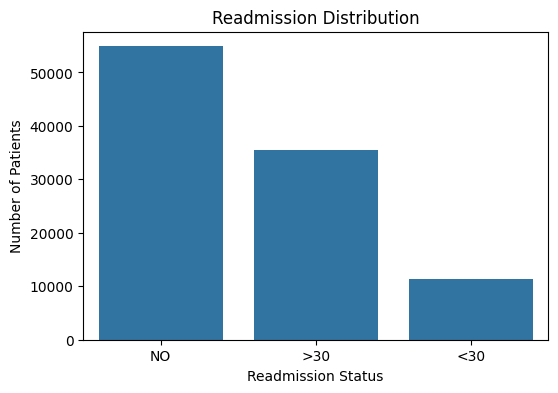

In [ ]:

# Visualize target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x="readmitted", data=df)

plt.title("Readmission Distribution")
plt.xlabel("Readmission Status")
plt.ylabel("Number of Patients")

plt.show()

Most patients were not readmitted; fewer were readmitted within 30 days (<30)

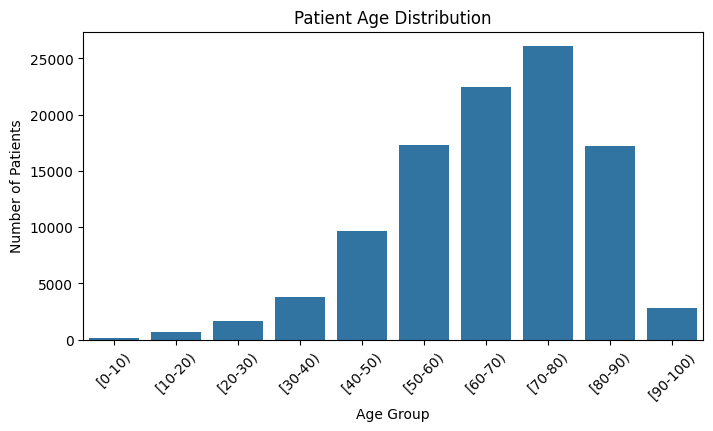

In [23]:
# Visualize patient age distribution
plt.figure(figsize=(8,4))
sns.countplot(x="age", data=df, order=sorted(df["age"].unique()))

plt.title("Patient Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")

plt.xticks(rotation=45)
plt.show()

Most patients are older adults, especially between 60–80 years

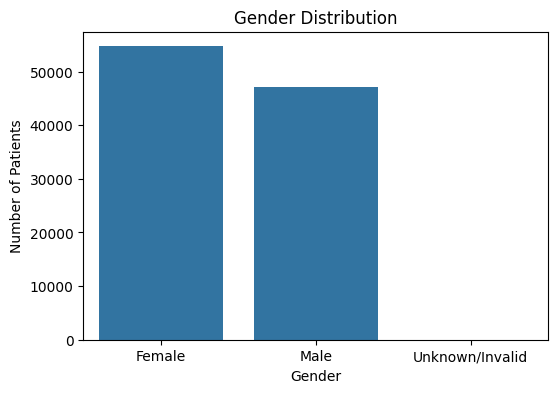

In [24]:
# Visualize gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")

plt.show()

Dataset has slightly more female than male patients

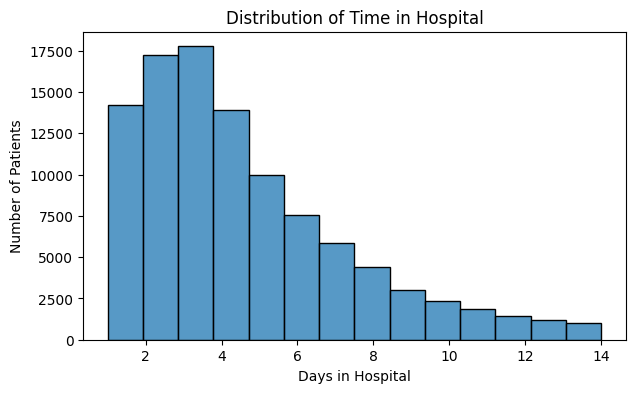

In [25]:
# Visualize length of hospital stay
plt.figure(figsize=(7,4))
sns.histplot(df["time_in_hospital"], bins=14)

plt.title("Distribution of Time in Hospital")
plt.xlabel("Days in Hospital")
plt.ylabel("Number of Patients")

plt.show()


Most patients stay between 2–5 days; long hospital stays are less common

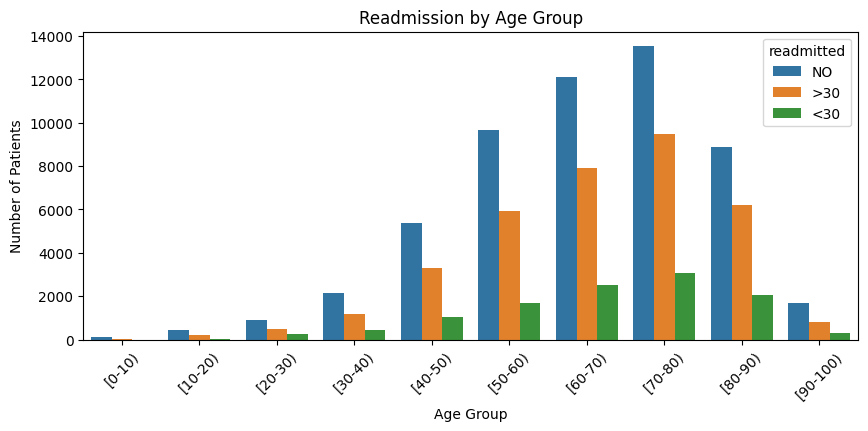

In [26]:
# Readmission by age group
plt.figure(figsize=(10,4))
sns.countplot(x="age", hue="readmitted", data=df, order=sorted(df["age"].unique()))

plt.title("Readmission by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")

plt.xticks(rotation=45)
plt.show()

Readmissions are more frequent among older patients, especially age 60–80

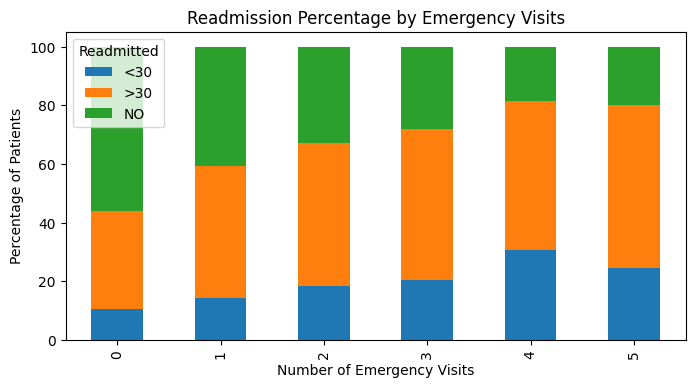

In [29]:
# Readmission rate by emergency visits (percentage)
subset = df[df["number_emergency"] <= 5]

# Create percentage table
table = pd.crosstab(subset["number_emergency"], subset["readmitted"], normalize="index") * 100

# Plot
table.plot(kind="bar", stacked=True, figsize=(8,4))

plt.title("Readmission Percentage by Emergency Visits")
plt.xlabel("Number of Emergency Visits")
plt.ylabel("Percentage of Patients")

plt.legend(title="Readmitted")
plt.show()

Patients with more emergency visits tend to have higher readmission rates

In [31]:
# Check unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].unique())


race:
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

gender:
['Female' 'Male' 'Unknown/Invalid']

age:
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

weight:
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

payer_code:
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

medical_specialty:
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurol